In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### Deining Activation functions and their derivates and other functions

In [10]:
class NeuralNetworkXOR:
    def __init__(self, learning_rate=1.0, activation='sigmoid'):
        np.random.seed(42) 
        
        self.W1 = np.random.randn(2, 2) * 0.5
        self.b1 = np.zeros((1, 2))
        
        self.W2 = np.random.randn(2, 1) * 0.5
        self.b2 = np.zeros((1, 1))
        
        self.learning_rate = learning_rate
        self.activation = activation
        self.losses = []
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def tanh(self, x):
        return np.tanh(x)
    
    def tanh_derivative(self, x):
        return 1 - x**2
    
    def forward_pass(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        
        if self.activation == 'sigmoid':
            self.a1 = self.sigmoid(self.z1)
        else:  
            self.a1 = self.tanh(self.z1)
        
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = self.sigmoid(self.z2)  
        
        return self.output
    
    def backward_pass(self, X, y, output):
        m = X.shape[0]
        
        output_error = output - y
        
        if self.activation == 'sigmoid':
            hidden_error = output_error.dot(self.W2.T) * self.sigmoid_derivative(self.a1)
        else: 
            hidden_error = output_error.dot(self.W2.T) * self.tanh_derivative(self.a1)
        
        self.W2 -= self.learning_rate * self.a1.T.dot(output_error) / m
        self.b2 -= self.learning_rate * np.sum(output_error, axis=0, keepdims=True) / m
        self.W1 -= self.learning_rate * X.T.dot(hidden_error) / m
        self.b1 -= self.learning_rate * np.sum(hidden_error, axis=0, keepdims=True) / m
    
    def train(self, X, y, epochs=5000):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward_pass(X)
            
            loss = np.mean((output - y) ** 2)
            self.losses.append(loss)
            
            # Backward pass
            self.backward_pass(X, y, output)
            
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
    
    def predict(self, X):
        return self.forward_pass(X)
    
    def calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        predicted_labels = (predictions > 0.5).astype(int)
        accuracy = np.mean(predicted_labels == y) * 100
        return accuracy


In [11]:
X_xor = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

y_xor = np.array([[0],
                  [1],
                  [1],
                  [0]])

print("XOR Problem Solution using Neural Network with Backpropagation\n")

print("\n1. Training with Sigmoid Activation Function")
nn_sigmoid = NeuralNetworkXOR(learning_rate=1.0, activation='sigmoid')
nn_sigmoid.train(X_xor, y_xor, epochs=10000)

print("\n2. Training with Tanh Activation Function")
nn_tanh = NeuralNetworkXOR(learning_rate=1.0, activation='tanh')
nn_tanh.train(X_xor, y_xor, epochs=10000)



XOR Problem Solution using Neural Network with Backpropagation


1. Training with Sigmoid Activation Function
Epoch 0, Loss: 0.251156
Epoch 1000, Loss: 0.145184
Epoch 2000, Loss: 0.126341
Epoch 3000, Loss: 0.125667
Epoch 4000, Loss: 0.125441
Epoch 5000, Loss: 0.125329
Epoch 6000, Loss: 0.125261
Epoch 7000, Loss: 0.125217
Epoch 8000, Loss: 0.125185
Epoch 9000, Loss: 0.125161

2. Training with Tanh Activation Function
Epoch 0, Loss: 0.250566
Epoch 1000, Loss: 0.125368
Epoch 2000, Loss: 0.125170
Epoch 3000, Loss: 0.125110
Epoch 4000, Loss: 0.125081
Epoch 5000, Loss: 0.125064
Epoch 6000, Loss: 0.125053
Epoch 7000, Loss: 0.125045
Epoch 8000, Loss: 0.125040
Epoch 9000, Loss: 0.125035


In [12]:
print("RESULTS COMPARISON")

print("\nSigmoid Network Results:")
sigmoid_predictions = nn_sigmoid.predict(X_xor)
sigmoid_accuracy = nn_sigmoid.calculate_accuracy(X_xor, y_xor)

for i in range(len(X_xor)):
    print(f"Input: {X_xor[i]} -> Predicted: {sigmoid_predictions[i][0]:.4f}, Expected: {y_xor[i][0]}")
print(f"Accuracy: {sigmoid_accuracy:.2f}%")

print("\nTanh Network Results:")
tanh_predictions = nn_tanh.predict(X_xor)
tanh_accuracy = nn_tanh.calculate_accuracy(X_xor, y_xor)

for i in range(len(X_xor)):
    print(f"Input: {X_xor[i]} -> Predicted: {tanh_predictions[i][0]:.4f}, Expected: {y_xor[i][0]}")
print(f"Accuracy: {tanh_accuracy:.2f}%")



RESULTS COMPARISON

Sigmoid Network Results:
Input: [0 0] -> Predicted: 0.0007, Expected: 0
Input: [0 1] -> Predicted: 0.4997, Expected: 1
Input: [1 0] -> Predicted: 0.9994, Expected: 1
Input: [1 1] -> Predicted: 0.5003, Expected: 0
Accuracy: 50.00%

Tanh Network Results:
Input: [0 0] -> Predicted: 0.0001, Expected: 0
Input: [0 1] -> Predicted: 0.4999, Expected: 1
Input: [1 0] -> Predicted: 0.9999, Expected: 1
Input: [1 1] -> Predicted: 0.5001, Expected: 0
Accuracy: 50.00%


### Final Weights

In [13]:
print("\nSigmoid Network Weights:")
print(f"Input to Hidden Weights (W1):\n{nn_sigmoid.W1}")
print(f"Hidden to Output Weights (W2):\n{nn_sigmoid.W2}")
print(f"Hidden Layer Bias (b1): {nn_sigmoid.b1}")
print(f"Output Layer Bias (b2): {nn_sigmoid.b2}")

print("\nTanh Network Weights:")
print(f"Input to Hidden Weights (W1):\n{nn_tanh.W1}")
print(f"Hidden to Output Weights (W2):\n{nn_tanh.W2}")
print(f"Hidden Layer Bias (b1): {nn_tanh.b1}")
print(f"Output Layer Bias (b2): {nn_tanh.b2}")



Sigmoid Network Weights:
Input to Hidden Weights (W1):
[[ 5.03709432 -5.18152651]
 [10.61579374 10.73205196]]
Hidden to Output Weights (W2):
[[ 9.00824562]
 [-9.06608801]]
Hidden Layer Bias (b1): [[-1.66393325  3.43735299]]
Output Layer Bias (b2): [[0.05773838]]

Tanh Network Weights:
Input to Hidden Weights (W1):
[[ 2.77107699 -2.79174404]
 [ 6.25120087  6.29483306]]
Hidden to Output Weights (W2):
[[ 5.27312044]
 [-5.2709855 ]]
Hidden Layer Bias (b1): [[-0.93406927  1.82172443]]
Output Layer Bias (b2): [[-0.00214424]]


### Visualize loss vs epochs


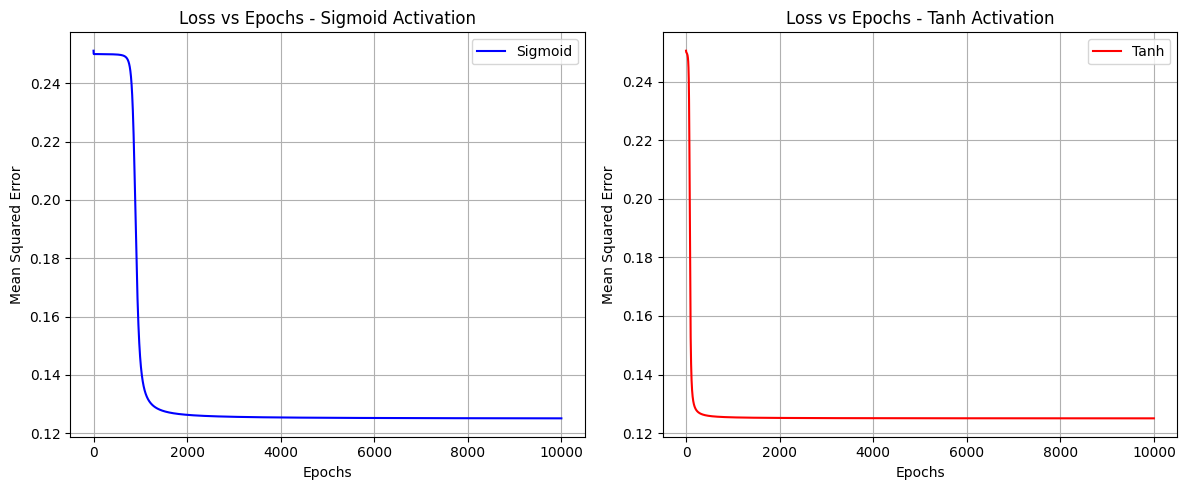

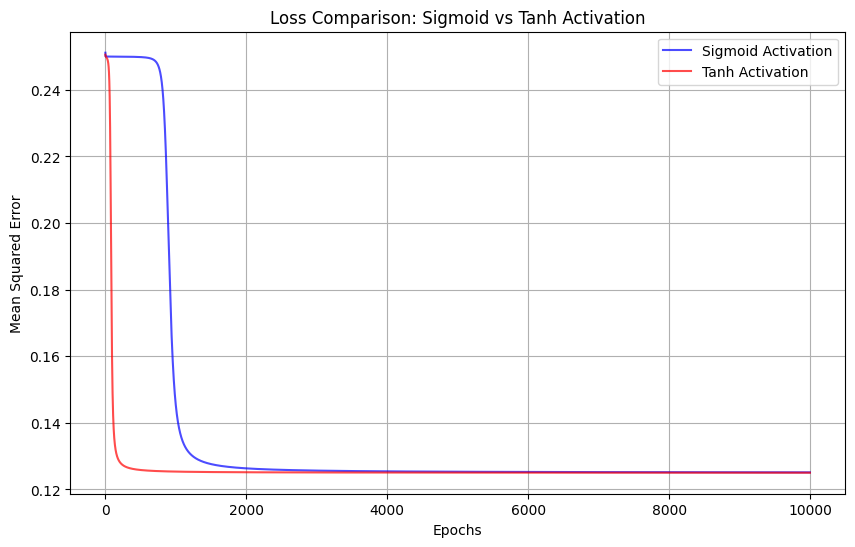


Final Loss - Sigmoid: 0.125143
Final Loss - Tanh: 0.125031


In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(nn_sigmoid.losses, label='Sigmoid', color='blue')
plt.title('Loss vs Epochs - Sigmoid Activation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nn_tanh.losses, label='Tanh', color='red')
plt.title('Loss vs Epochs - Tanh Activation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(nn_sigmoid.losses, label='Sigmoid Activation', color='blue', alpha=0.7)
plt.plot(nn_tanh.losses, label='Tanh Activation', color='red', alpha=0.7)
plt.title('Loss Comparison: Sigmoid vs Tanh Activation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nFinal Loss - Sigmoid: {nn_sigmoid.losses[-1]:.6f}")
print(f"Final Loss - Tanh: {nn_tanh.losses[-1]:.6f}")

- The loss function decreases way faster and earlier for the Tanh activation function then Sigmoid activation function which drops 2000 epoches later
- Though with 10000 epoches this doesn;t really matter as both perform equally well with almost similary loss values at the end